<a href="https://colab.research.google.com/github/yoshitha1209/Machine-Learning/blob/main/23003_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [ ]:
file_path = "/content/Copy of training_mathbert(1).xlsx"
df = pd.read_excel(file_path)

X = df.drop(columns=['output'])
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_single = X_train.iloc[:, [0]]
X_test_single = X_test.iloc[:, [0]]
reg = LinearRegression().fit(X_train_single, y_train)
y_train_pred = reg.predict(X_train_single)
y_test_pred = reg.predict(X_test_single)
print("Linear Regression (Single Attribute):")
print("Train Predictions:", y_train_pred)
print("Test Predictions:", y_test_pred)

Linear Regression (Single Attribute):
Train Predictions: [3.1175887  3.19196711 3.1189797  3.14560169 3.19314754 3.21944069
 3.04408897 3.04200882 3.16530734 3.20664411 3.04357056 3.15685109
 3.03334625 3.12180747 3.21502438 3.17838101 3.10861562 3.29541964
 3.2400093  3.02937538 3.11225721 3.10621174 3.12798963 3.19293286
 3.19428617 3.27028133 3.35221383 3.13781118 3.05397326 3.3121804
 3.22493623 3.14404866 3.20063964 3.04824361 3.21011705 3.36079793
 3.06712467 3.06707793 3.20997537 3.26849014 3.11558719 3.09182886
 3.08126014 3.24628379 3.21196649 3.06917077 3.0883947  3.20278882
 3.21781571 3.11977455 3.18661568 3.05169642 3.20634687 3.11449724
 3.03031961 3.06329698 3.1905255  3.1499696  3.0144994  3.25876486
 3.22640023 3.00858521 3.24298846 3.13013012 3.12526376 3.08942816
 2.93262109 3.35106131 3.23590863 3.16753842 3.21223764 3.20212659
 3.09688378 3.23080567 3.29538241 3.15214005 3.10370819 3.05017083
 3.23804637 3.17459792 3.25376855 3.06329698 3.07713639 3.23669422
 3.018

In [ ]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Metrics (Single Attribute):", mse_train, rmse_train, mape_train, r2_train)
print("Metrics (Test Data):", mse_test, rmse_test, mape_test, r2_test)

Metrics (Single Attribute): 1.3618586756930053 1.1669870075082265 142324572671023.0 0.0052754335314767475
Metrics (Test Data): 1.3885595634666783 1.1783715727505812 60703281590984.914 -0.00881950367199047


In [ ]:
reg_all = LinearRegression().fit(X_train, y_train)
y_train_pred_all = reg_all.predict(X_train)
y_test_pred_all = reg_all.predict(X_test)
print("Linear Regression (All Attributes):")
print("Train Predictions:", y_train_pred_all)
print("Test Predictions:", y_test_pred_all)

mse_train_all = mean_squared_error(y_train, y_train_pred_all)
mse_test_all = mean_squared_error(y_test, y_test_pred_all)
rmse_train_all = np.sqrt(mse_train_all)
rmse_test_all = np.sqrt(mse_test_all)
mape_train_all = mean_absolute_percentage_error(y_train, y_train_pred_all)
mape_test_all = mean_absolute_percentage_error(y_test, y_test_pred_all)
r2_train_all = r2_score(y_train, y_train_pred_all)
r2_test_all = r2_score(y_test, y_test_pred_all)
print("Metrics (All Attributes):", mse_train_all, rmse_train_all, mape_train_all, r2_train_all)
print("Metrics (Test Data):", mse_test_all, rmse_test_all, mape_test_all, r2_test_all)


Linear Regression (All Attributes):
Train Predictions: [ 3.55017289  3.36154227  3.02889186  3.76962816  4.02814745  3.40443323
  2.78220524  3.54382998  3.67712224  4.19809597  3.14014464  4.4595238
  2.95757543  5.2360023   4.40632902  4.46552495  3.95771814  4.00237093
  3.00459896  2.7860359   3.4127125   2.42940999  3.01395473  4.07477838
  0.5908489   0.66641882  3.55088907  3.82432902  3.43425172  2.9894592
  2.57991454  2.47513833  3.29812801  2.80928517  3.9827652   2.88069795
  1.60463235  3.49547542  3.2935967   4.19424065  3.90517815  4.02160752
  3.20507807  1.90158828  0.97112934  1.8277469   1.39953422  1.57865158
  1.1744333   4.61569183  2.98892481  1.41659921  3.89629633  3.08047792
  1.53774595  3.21480622  2.22526532  4.76245861  2.69244869  3.64777853
  4.30082075  2.0577021   2.7683165   3.82208499  3.81026434  3.15649783
  3.55181421  3.39980771  4.34543477  2.52872965  1.1673869   3.53635891
  1.42242971  4.0546903   2.47971396  4.19637927  3.39603776  3.5342063

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(X_train)
kmeans_labels = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_
print("K-Means Clustering (k=2):")
print("Cluster Centers:", kmeans_centers)
print("Labels:", kmeans_labels)

K-Means Clustering (k=2):
Cluster Centers: [[-2.86091153e-01  1.46494722e-01  6.72568498e-02  2.20422883e-01
  -4.22855402e-01 -2.18234024e-01  6.90933595e-04  2.00970478e-01
   6.63337462e-02  1.59181328e-02  2.59102472e-01 -7.17745018e-02
   5.23582990e-02  6.32862917e-02 -5.10324010e-02  1.83006448e-01
  -6.74032965e-01  1.16027438e-01 -4.41915534e-01  6.90597196e-02
  -9.13174893e-02 -2.87932430e-01 -1.73863753e-01 -9.08758263e-02
   1.25681099e-01  2.57493588e-01  5.88084567e-02  2.91031053e-01
   2.25878212e-01 -1.00471103e-01  3.47946902e-01  9.91065077e-02
   2.99092761e-01  1.36757206e-02  4.82632788e-02 -2.21916860e-01
  -1.13338155e-01  1.99081415e-01  1.11680606e-01  3.58926027e-02
  -7.77895213e-02  7.78698853e-02  1.38426885e-01  6.71554217e-02
   1.62279618e-01 -2.85107694e-01  2.65355663e-02  2.17618780e-01
   8.15161739e-02 -1.56569317e-01  3.88977903e-02  8.62517841e-02
   4.58711374e-02 -1.17422218e-01 -2.43743724e-01  1.32887300e-01
  -9.54655027e-02 -9.16005733e-02

In [ ]:
sil_score = silhouette_score(X_train, kmeans_labels)
ch_score = calinski_harabasz_score(X_train, kmeans_labels)
db_score = davies_bouldin_score(X_train, kmeans_labels)
print("Clustering Scores:", sil_score, ch_score, db_score)

Clustering Scores: 0.09997725181257422 105.98563379659078 2.563729128055641


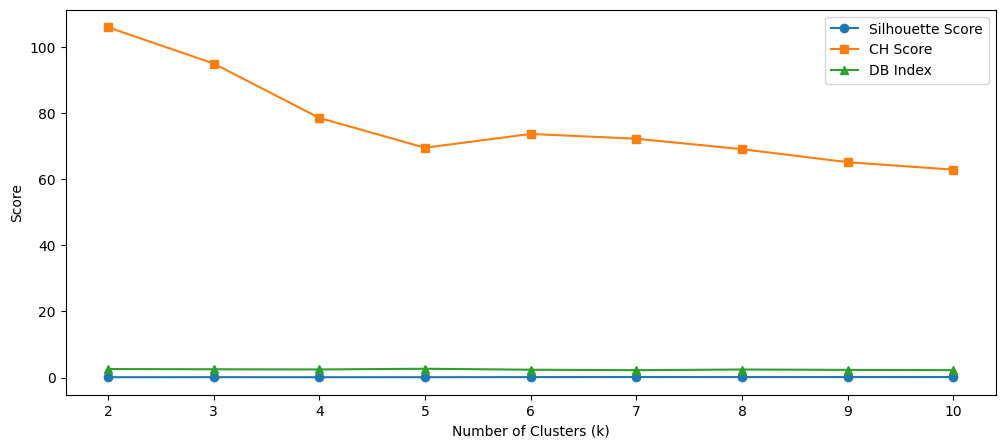

In [ ]:
sil_scores, ch_scores, db_scores = [], [], []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X_train)
    sil_scores.append(silhouette_score(X_train, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X_train, kmeans.labels_))
    db_scores.append(davies_bouldin_score(X_train, kmeans.labels_))

plt.figure(figsize=(12, 5))
plt.plot(k_values, sil_scores, marker='o', label='Silhouette Score')
plt.plot(k_values, ch_scores, marker='s', label='CH Score')
plt.plot(k_values, db_scores, marker='^', label='DB Index')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.legend()
plt.show()

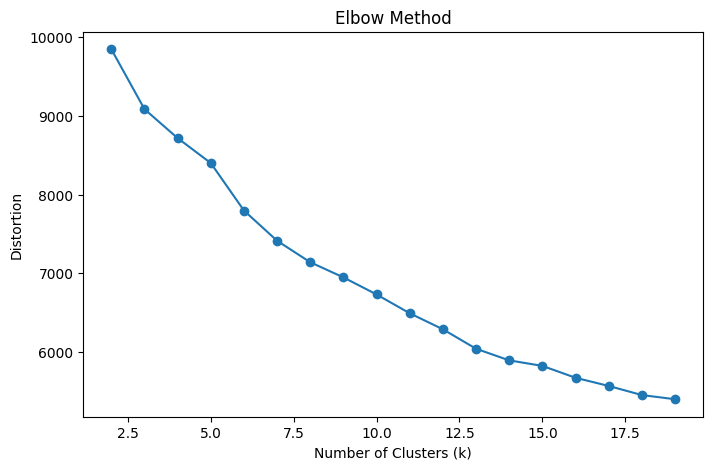

In [ ]:
distortions = []
k_values = range(2, 20)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X_train)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()